1. Ridge regression (solving overfitting).
2. Lambda in theory but Alpha in sklearn for hyperparamter tuning.
3. GridSearchCV used for perfect paramter selection.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
import warnings

warnings.filterwarnings("ignore")

In [ ]:
dataset = pd.read_csv("Melbourne_housing_FULL.csv")
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
useful_cols = [
    "Suburb",
    "Rooms",
    "Type",
    "Price",
    "Method",
    "SellerG",
    "Distance",
    "Bedroom2",
    "Bathroom",
    "Car",
    "Landsize",
    "BuildingArea",
    "CouncilArea",
    "Regionname",
    "Propertycount",
]
dataset = dataset[useful_cols]
dataset.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,Jellis,2.5,2.0,1.0,1.0,126.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.0,79.0,Yarra City Council,Northern Metropolitan,4019.0
3,Abbotsford,3,u,NaN,VB,Rounds,2.5,3.0,2.0,1.0,0.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.0,150.0,Yarra City Council,Northern Metropolitan,4019.0


In [25]:
dataset.shape

(34857, 15)

In [28]:
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Distance             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
CouncilArea          3
Regionname           3
Propertycount        3
dtype: int64

In [ ]:
fill_zeroes = ["Propertycount", "Distance", "Bedroom2", "Bathroom", "Car"]
dataset[fill_zeroes] = dataset[fill_zeroes].fillna(0)
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Distance             0
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
CouncilArea          3
Regionname           3
Propertycount        0
dtype: int64

In [ ]:
dataset["Landsize"] = dataset["Landsize"].fillna(dataset.Landsize.mean())
dataset["BuildingArea"] = dataset["BuildingArea"].fillna(dataset.BuildingArea.mean())
dataset.isna().sum()

Suburb              0
Rooms               0
Type                0
Price            7610
Method              0
SellerG             0
Distance            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
CouncilArea         3
Regionname          3
Propertycount       0
dtype: int64

In [33]:
dataset.dropna(inplace=True)
dataset.isna().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

One Hot Encoding🔴


In [ ]:
dataset = pd.get_dummies(dataset, drop_first=True)
dataset.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,Suburb_Aberfeldie,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,2,1480000.0,2.5,2.0,1.0,1.0,202.0,160.2564,4019.0,False,...,False,True,False,False,True,False,False,False,False,False
2,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0000,4019.0,False,...,False,True,False,False,True,False,False,False,False,False
4,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0000,4019.0,False,...,False,True,False,False,True,False,False,False,False,False
5,3,850000.0,2.5,3.0,2.0,1.0,94.0,160.2564,4019.0,False,...,False,True,False,False,True,False,False,False,False,False
6,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0000,4019.0,False,...,False,True,False,False,True,False,False,False,False,False


ML starts here👇


In [ ]:
X = dataset.drop("Price", axis=1)
y = dataset["Price"]

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=2)

In [46]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression().fit(train_X, train_y)

In [48]:
linear_test_score = linear_reg.score(test_X, test_y)
linear_train_score = linear_reg.score(train_X, train_y)

In [49]:
from sklearn import linear_model

lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(train_X, train_y)

,alpha,50
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,100
,tol,0.1
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [50]:
lasso_test_score = lasso_reg.score(test_X, test_y)
lasso_train_score =lasso_reg.score(train_X, train_y)

In [51]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(train_X,train_y)

,alpha,50
,fit_intercept,True
,copy_X,True
,max_iter,100
,tol,0.1
,solver,'auto'
,positive,False
,random_state,None


In [52]:
ridge_test_score =ridge_reg.score(test_X, test_y)
ridge_train_score =ridge_reg.score(train_X, train_y)

## Visualization

In [57]:
scores = {
    "Models" : ['LinearRegression', 'Lasso', 'Ridge'],
    'Train R2' : [linear_train_score, lasso_train_score, ridge_train_score],
    'Test R2' : [linear_test_score, lasso_test_score, ridge_test_score]
}
scores_df = pd.DataFrame(scores)
scores_df

,Models,Train R2,Test R2
0,LinearRegression,0.682779,0.138537
1,Lasso,0.676736,0.663767
2,Ridge,0.662238,0.667085


In [60]:
scores_melted = scores_df.melt(id_vars='Models', var_name="Dataset", value_name="R2 Scores")
scores_melted

,Models,Dataset,R2 Scores
0,LinearRegression,Train R2,0.682779
1,Lasso,Train R2,0.676736
2,Ridge,Train R2,0.662238
3,LinearRegression,Test R2,0.138537
4,Lasso,Test R2,0.663767
5,Ridge,Test R2,0.667085


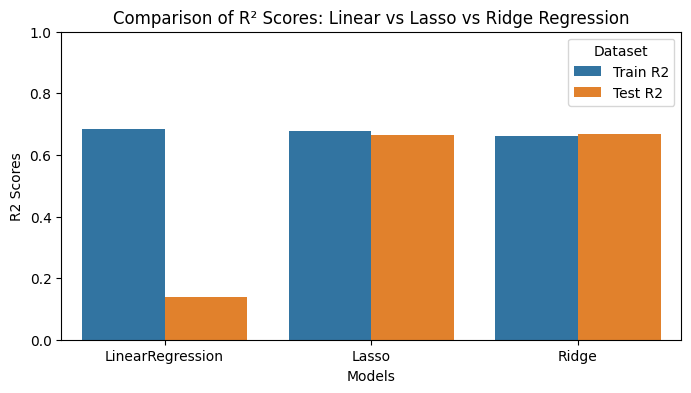

In [73]:
plt.figure(figsize=(8,4))
sns.barplot(data = scores_melted, x = 'Models', y = 'R2 Scores', hue = 'Dataset')
plt.title("Comparison of R² Scores: Linear vs Lasso vs Ridge Regression")
plt.ylim(0,1)
plt.ylabel("R2 Scores")
plt.show()